# Notebook for high throughput domain writing analysis

$ Yongtao Liu$

$June 15, 2023$

In [1]:
# You may need to sidpy if you did not do before
# !pip install sidpy

## Import

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py
import sidpy
import cv2
import imutils

## Set the directory and root name of your dataset

In [5]:
# directory
path = r"C:\Users\yla\Dropbox (ORNL)\My Files\AEcroscopy_BEPyAE\AEcroscopy_data\Experiment1"

# name
file_name = "Domain_Writing_"

# spot numbers
num_x = 8
num_y = 8

## Load all data

In [9]:
count_imgs = 64 # variable of how many images you have in the directory
pixel = 64  # pixel of your image

# change working directory
os.chdir(path)

# create arrays for all data
amplitude = np.zeros((count_imgs, pixel, pixel))
phase = np.zeros((count_imgs, pixel, pixel))
frequency = np.zeros((count_imgs, pixel, pixel))
qfactor = np.zeros((count_imgs, pixel, pixel))
topography = np.zeros((count_imgs, pixel, pixel))

for i in range (count_imgs):
    h5 = h5py.File('Domain_Writing_{}_0.hf5'.format(i), 'r+')
    be_qf = h5["BE Quick Fitting/Quick Fitting/Quick Fitting"]
    be_ch = h5["BE Channels/Channels/Channels"]
    amplitude[i,] = be_qf[:,:,0]
    phase[i,] = be_qf[:,:,3]
    frequency[i,] = be_qf[:,:,1]
    qfactor[i,] = be_qf[:,:,2]
    topography[i,] = be_ch[0,:,:,0]

nor_amplitude = (amplitude-amplitude.min())/amplitude.ptp()
nor_phase = (phase - phase.min())/phase.ptp()
nor_frequency = (frequency - frequency.min())/frequency.ptp()
nor_topography = (topography - topography.min())/topography.ptp()

## Plot data

Plot all results

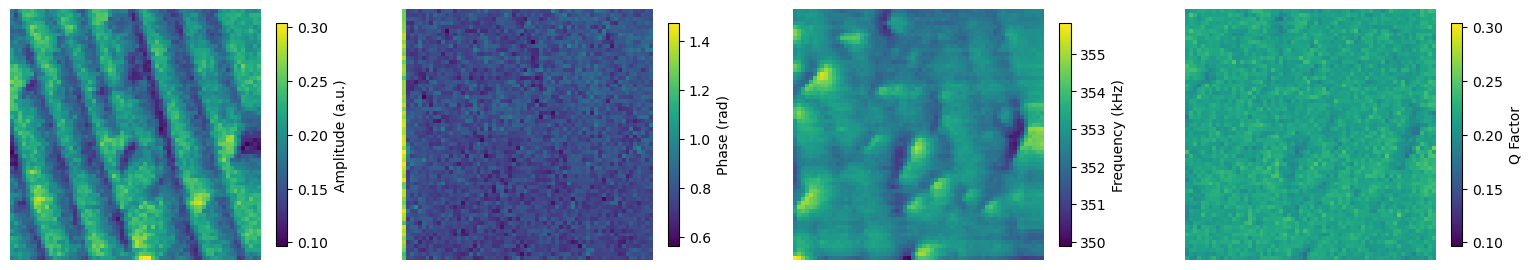

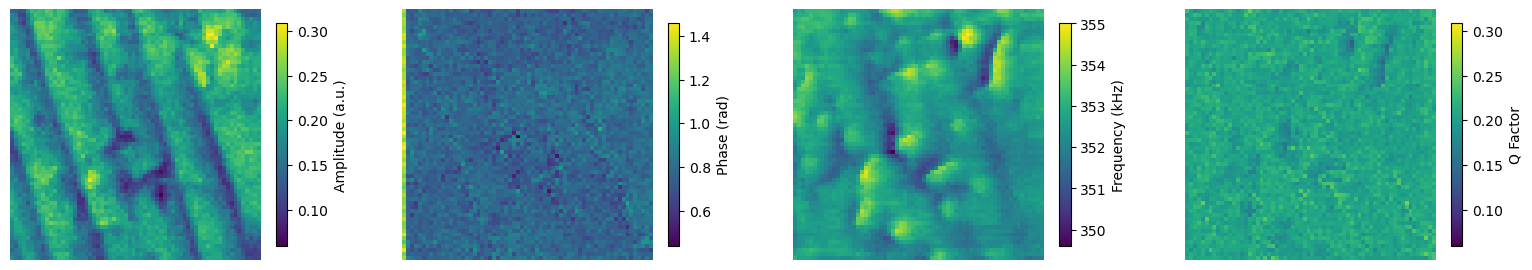

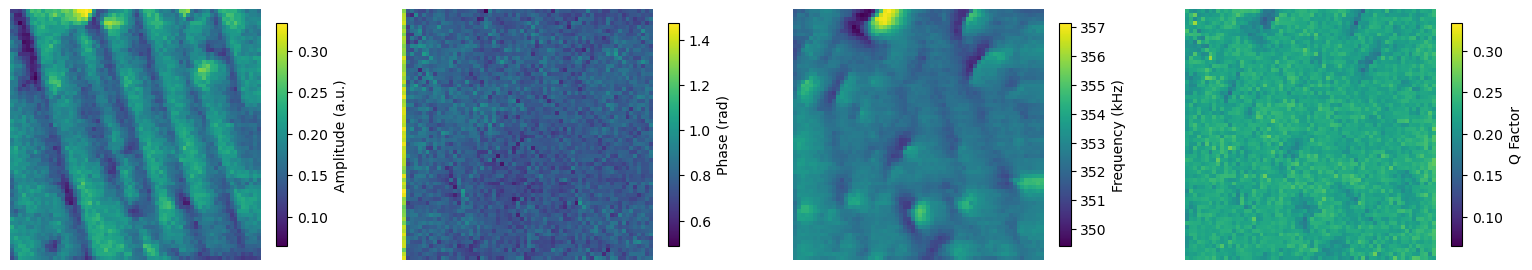

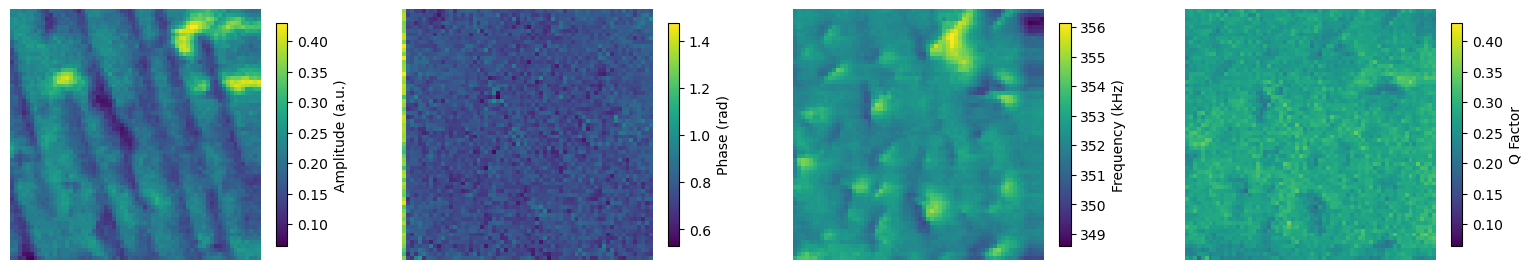

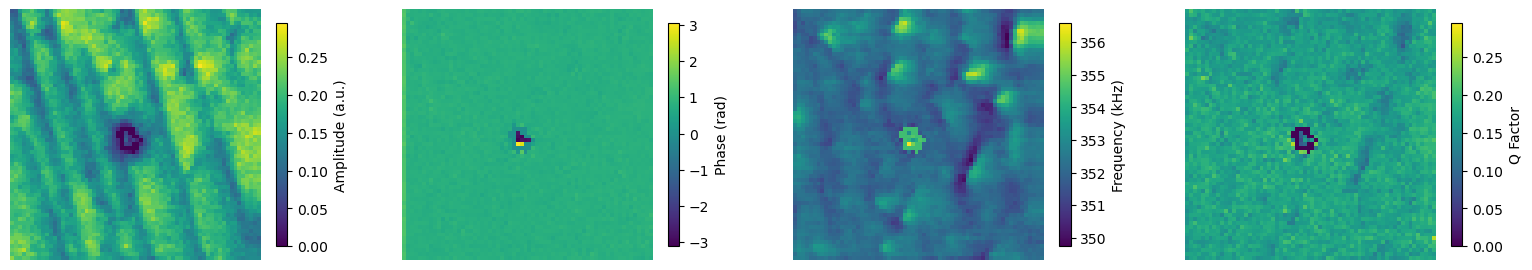

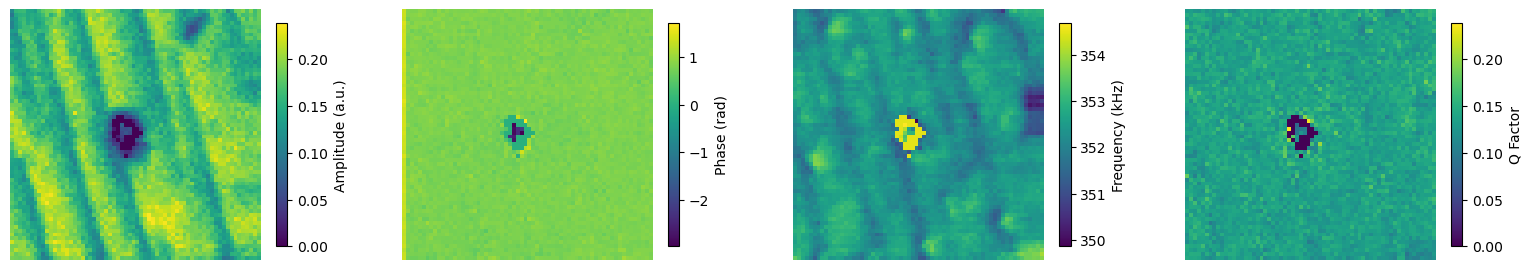

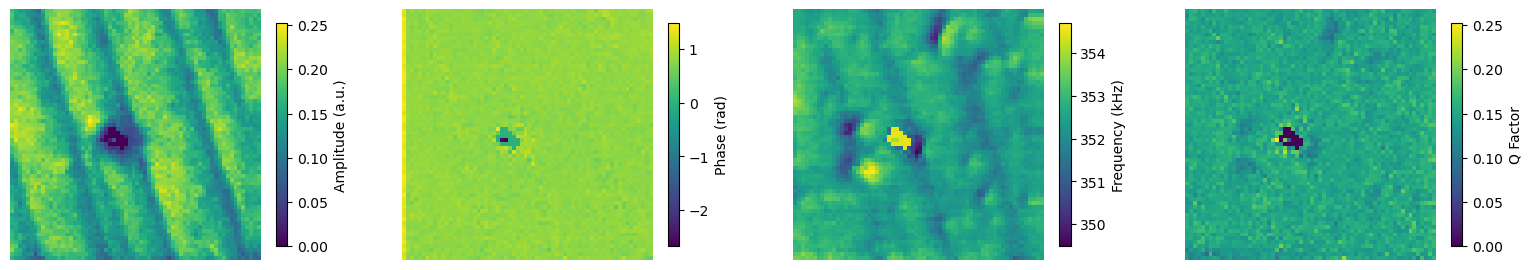

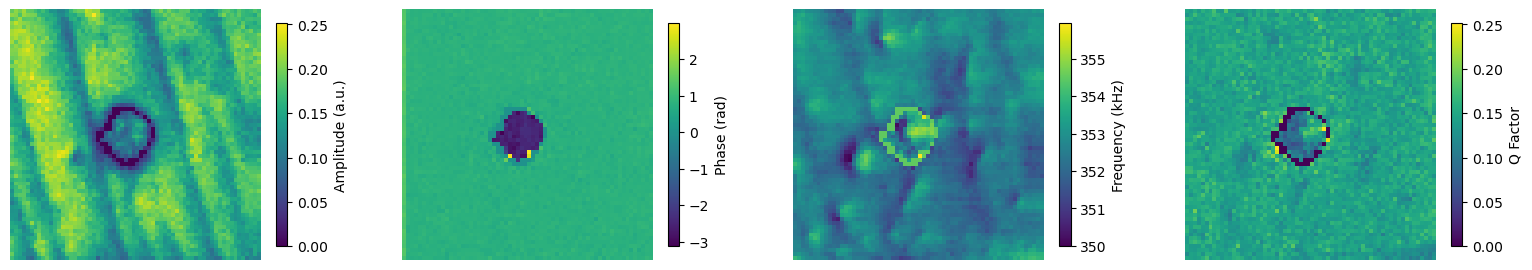

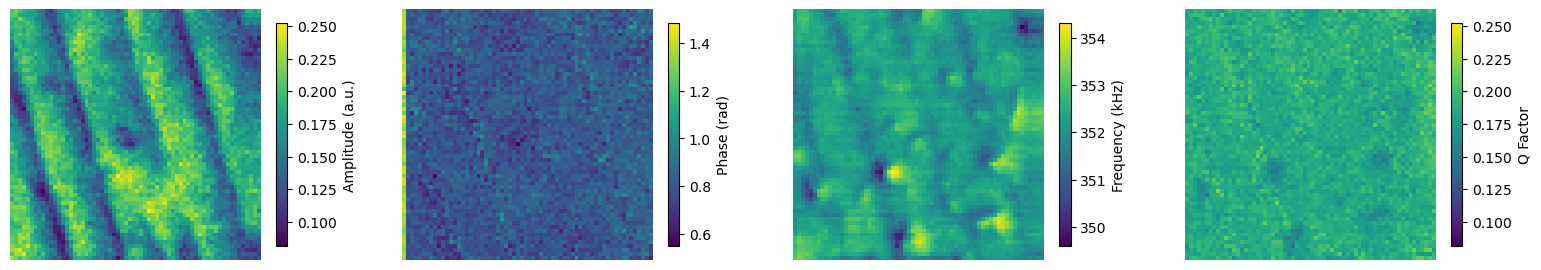

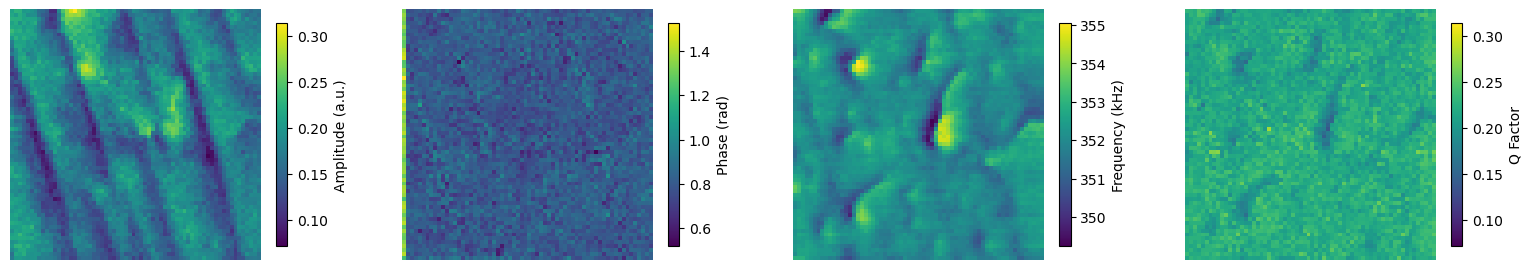

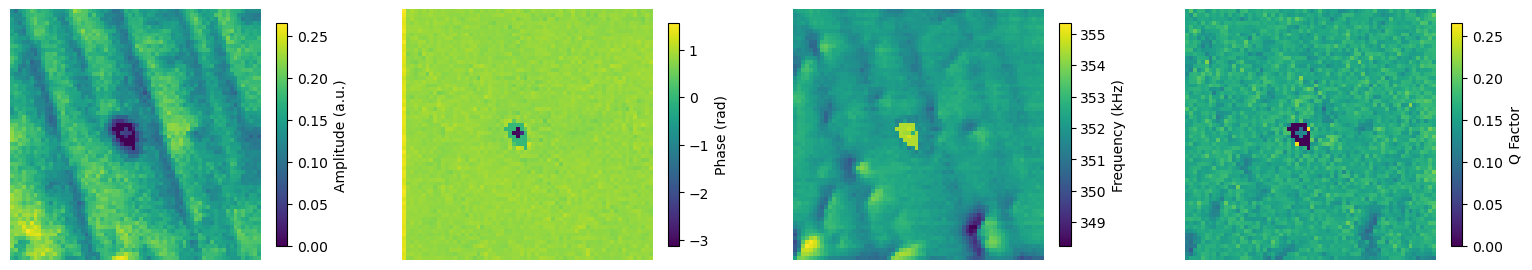

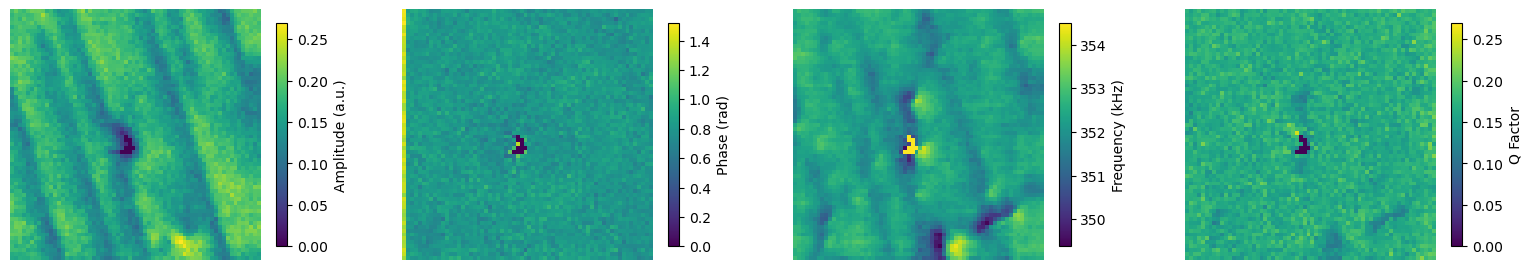

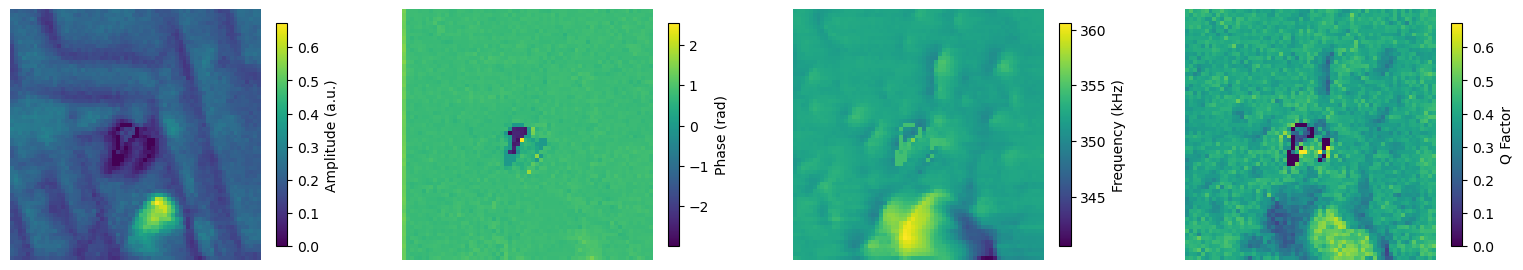

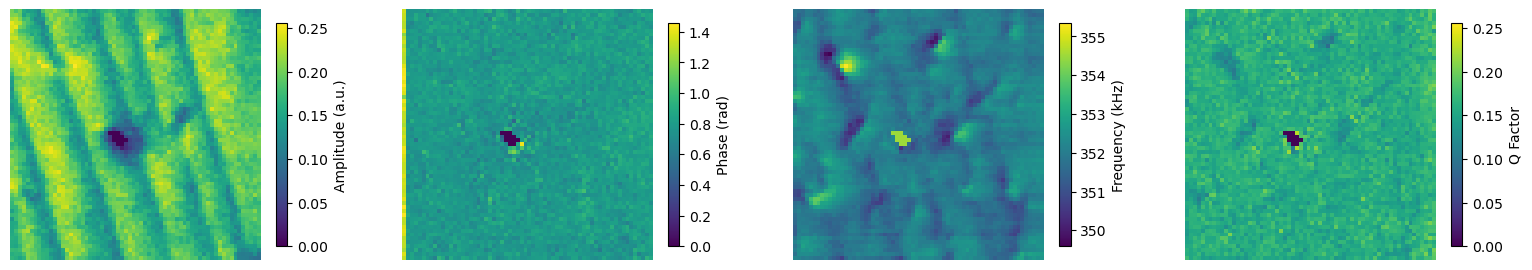

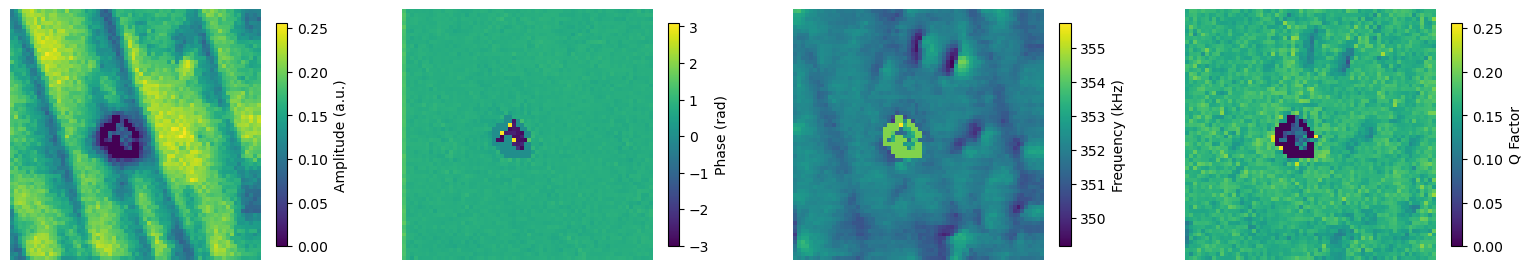

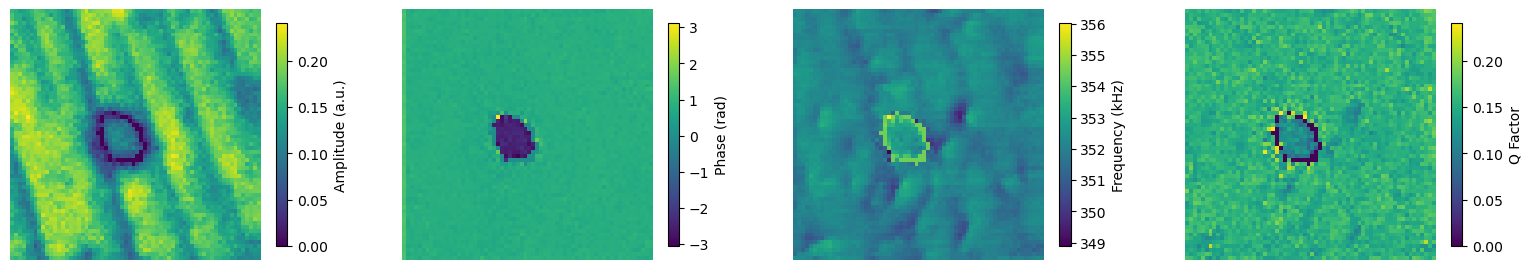

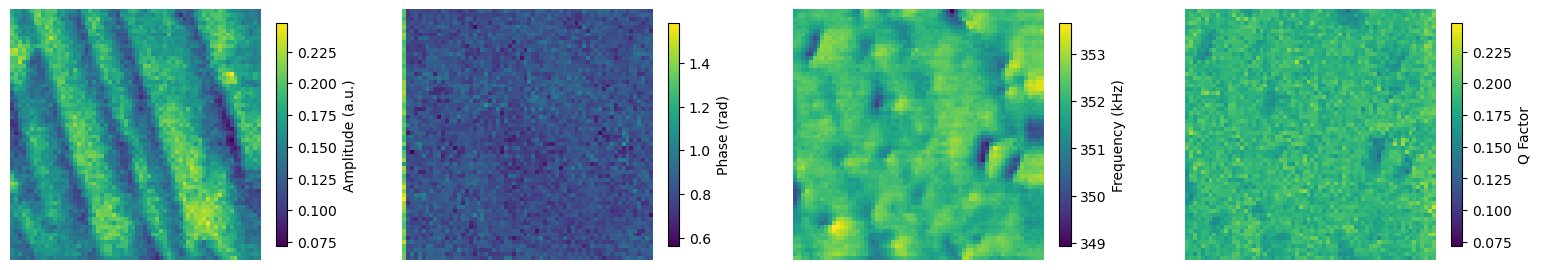

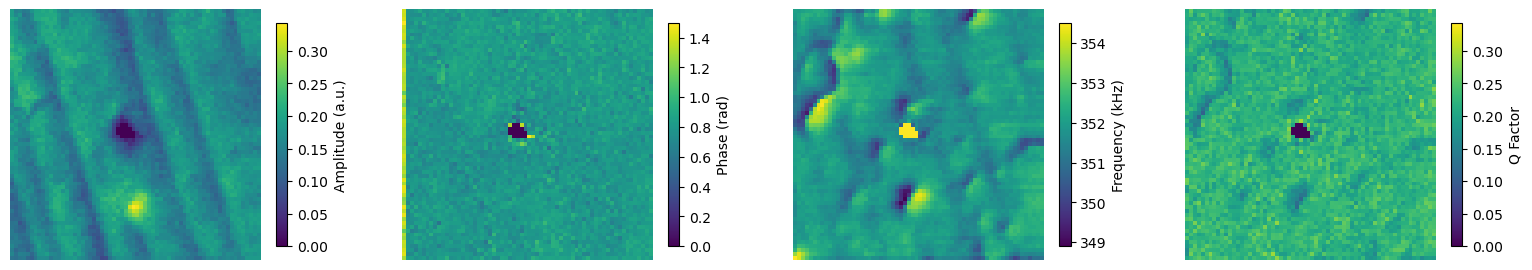

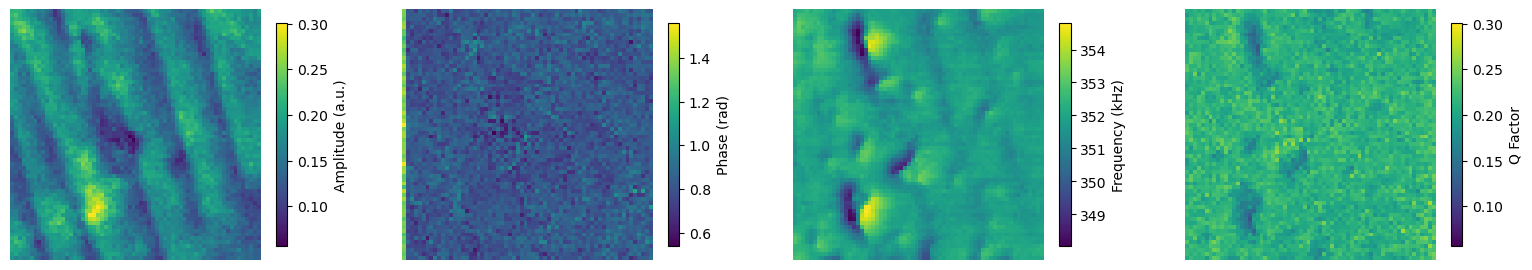

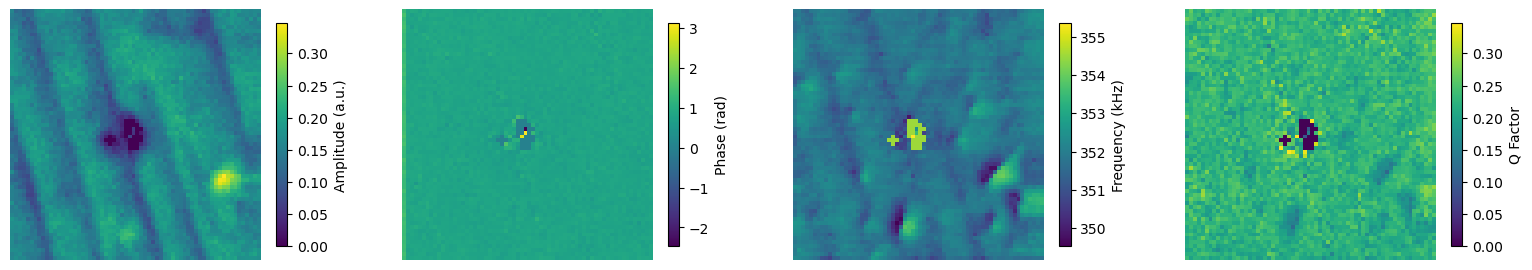

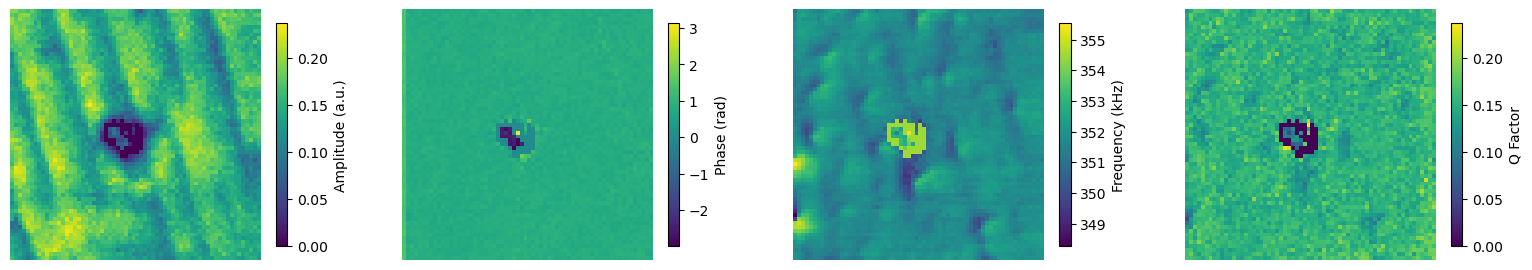

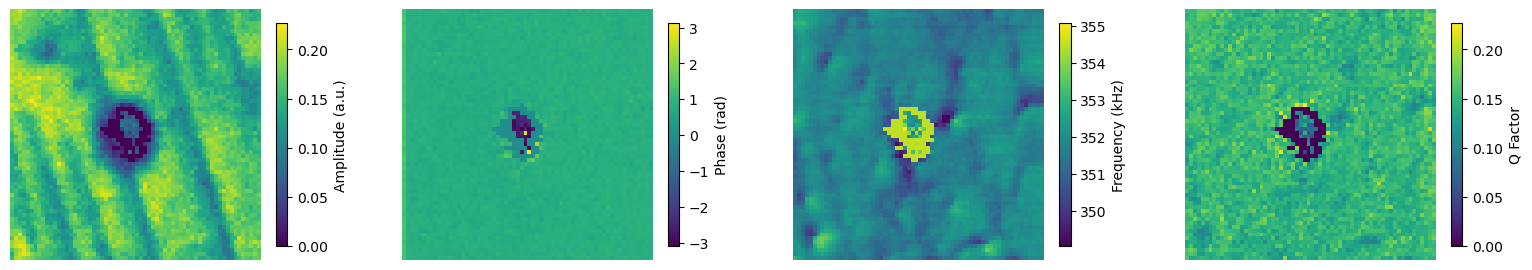

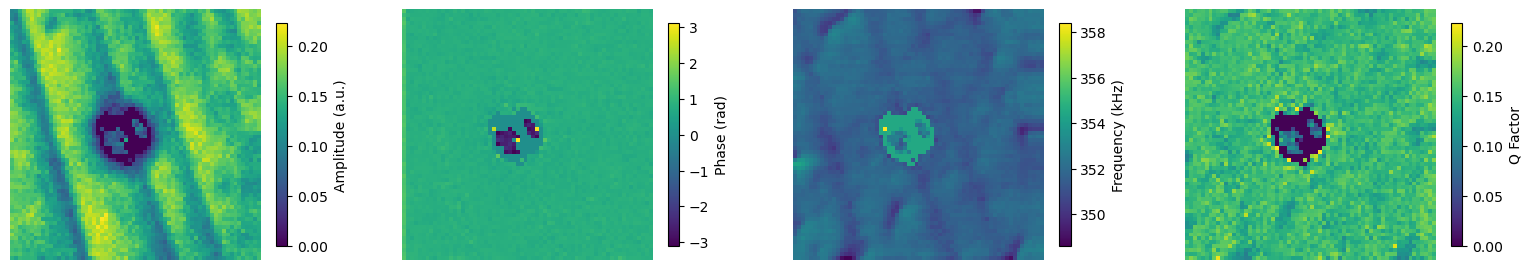

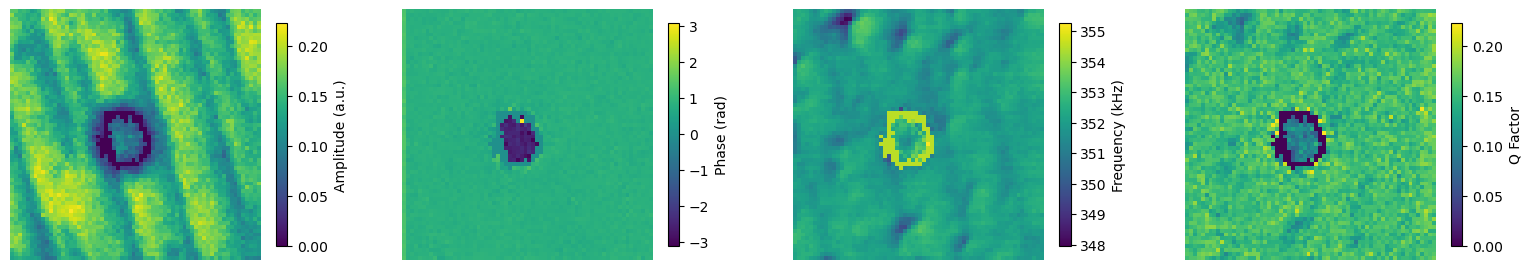

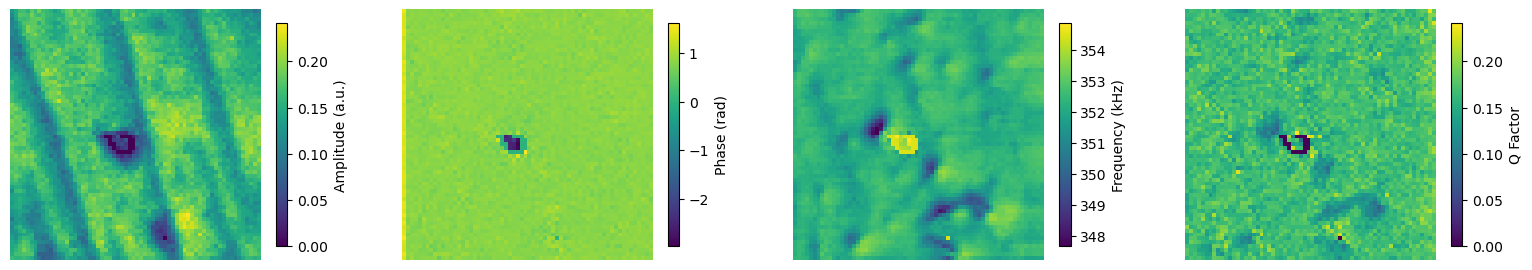

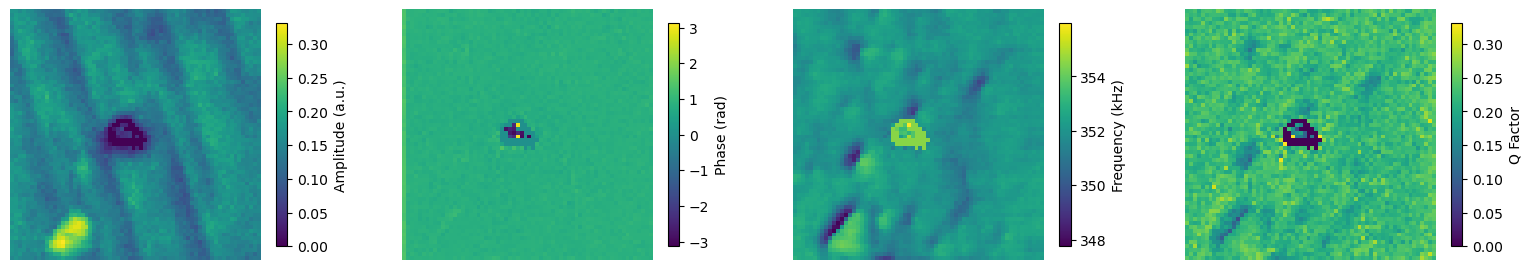

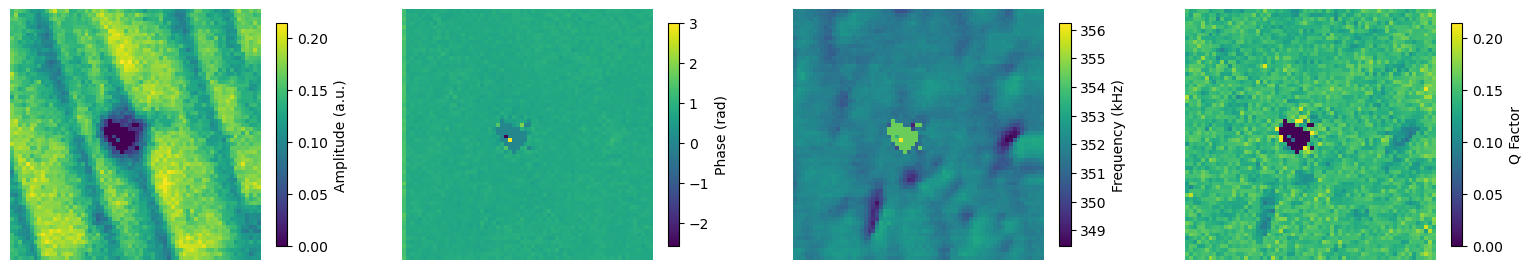

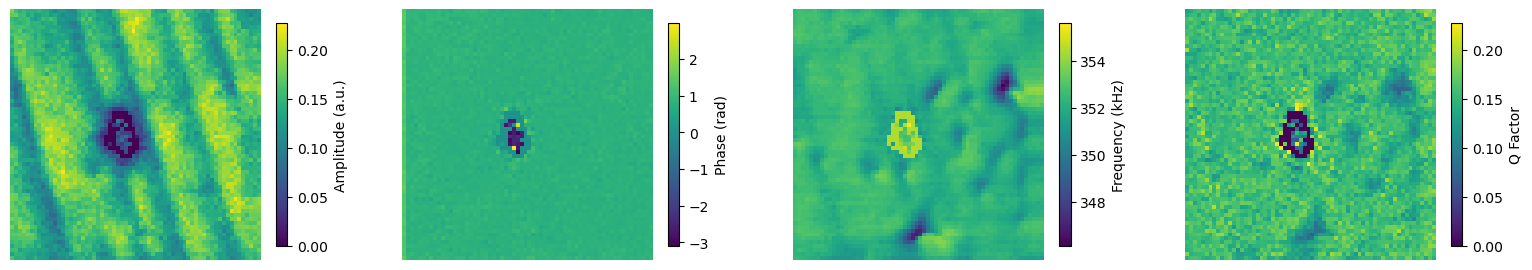

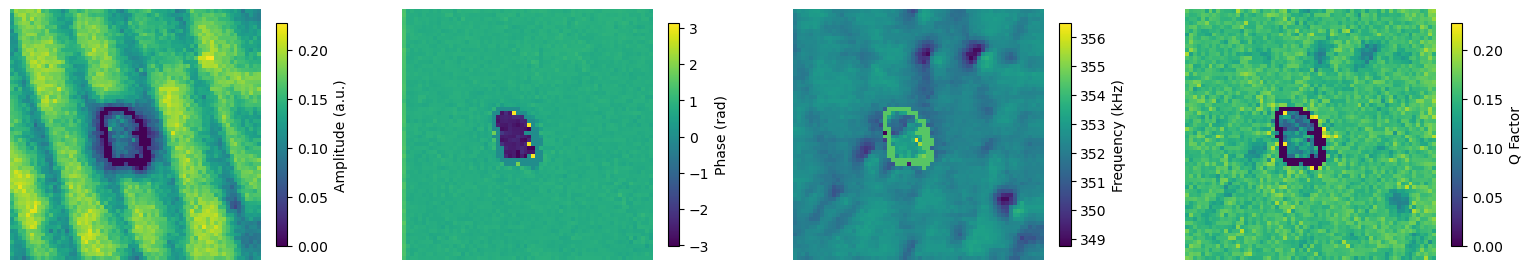

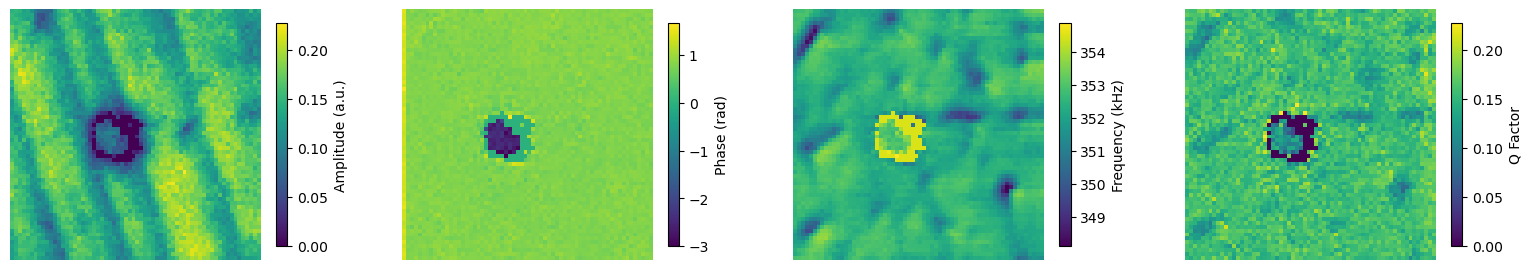

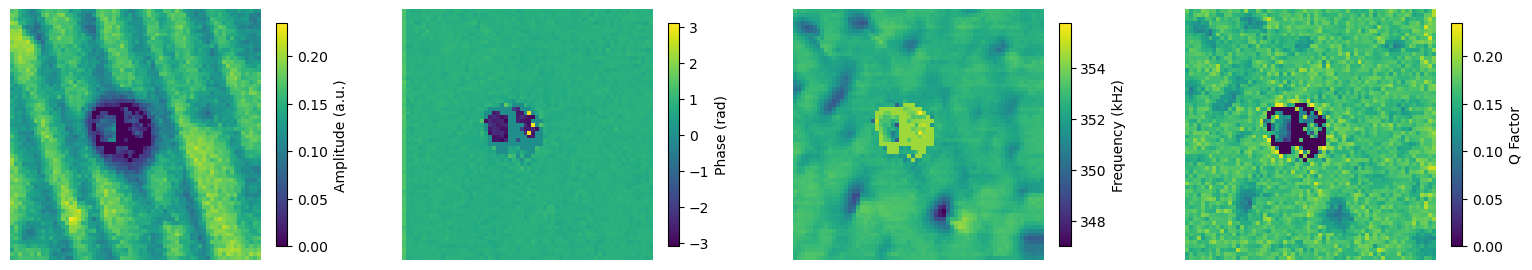

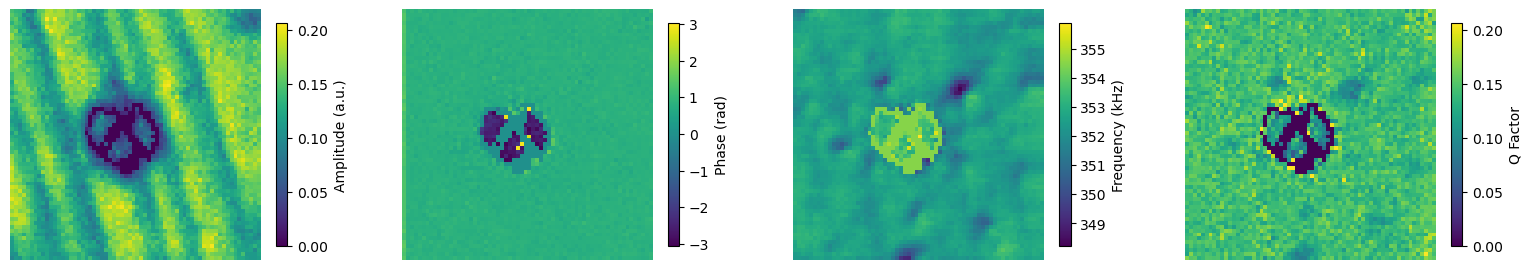

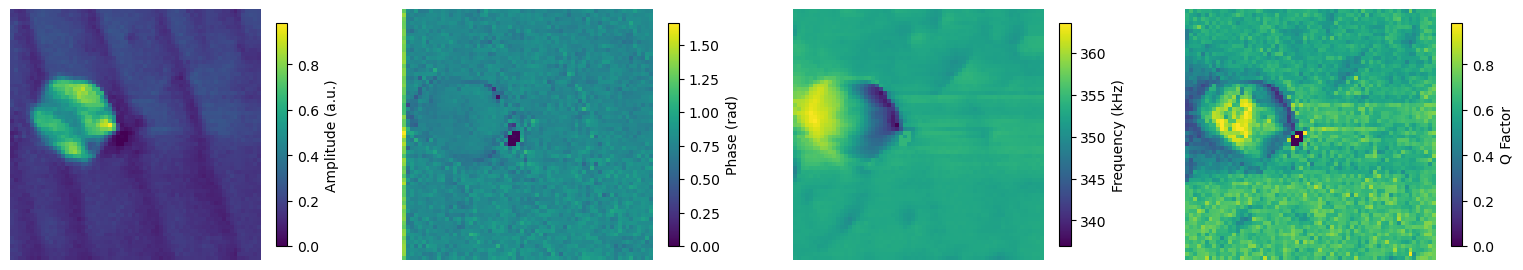

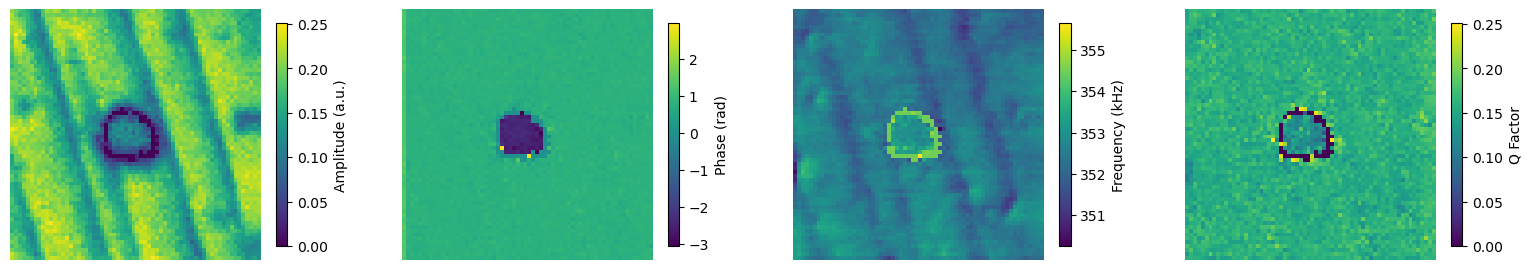

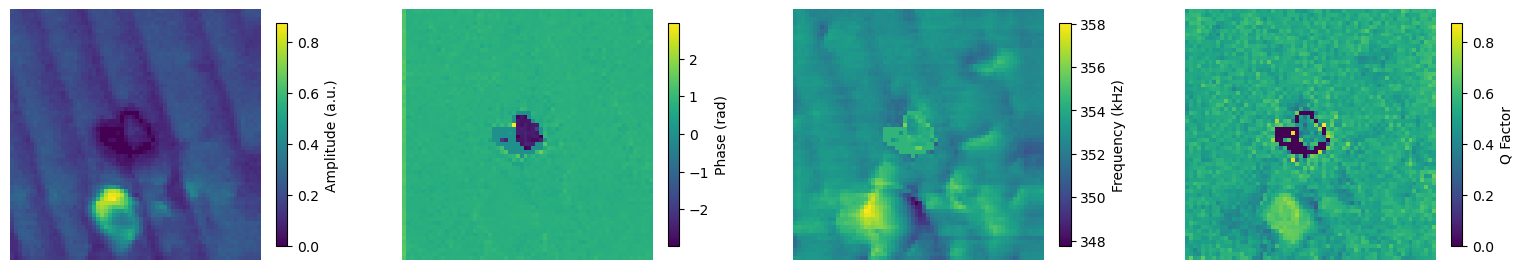

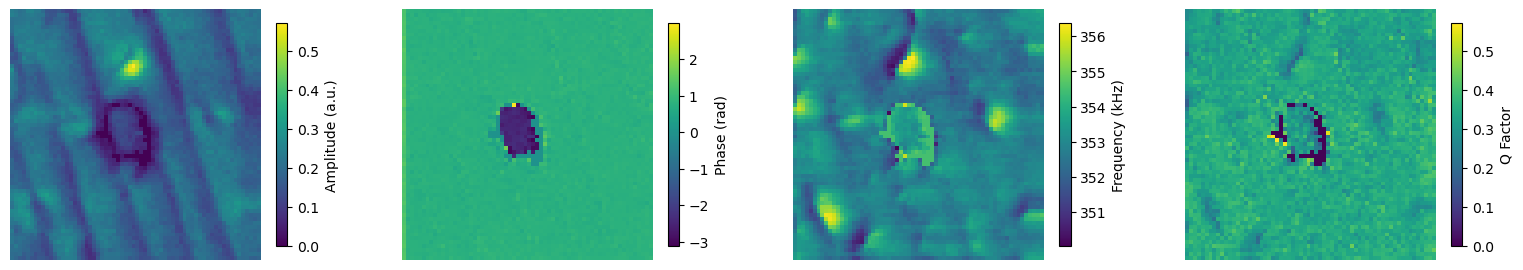

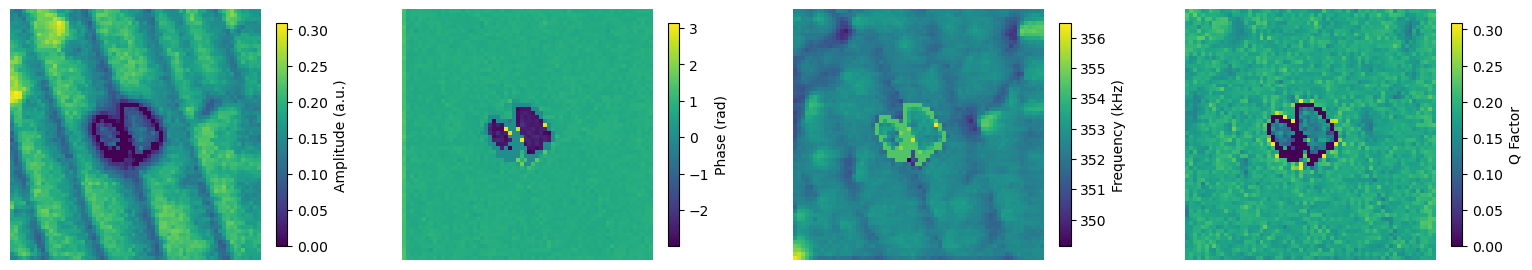

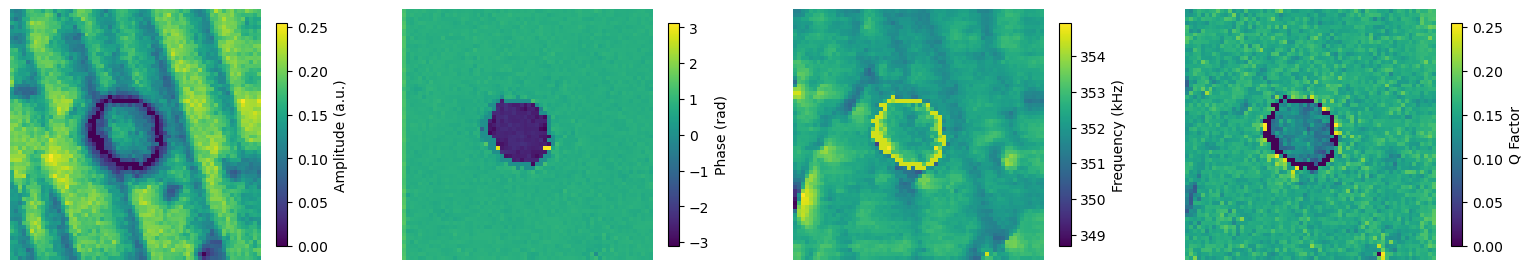

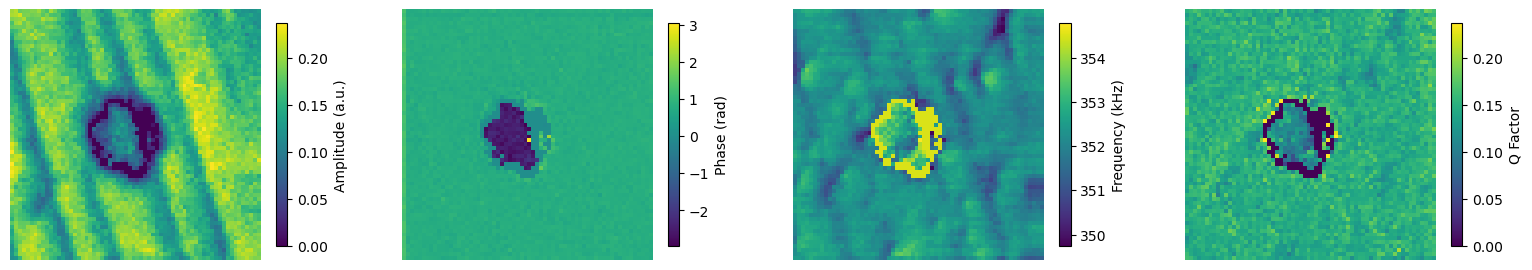

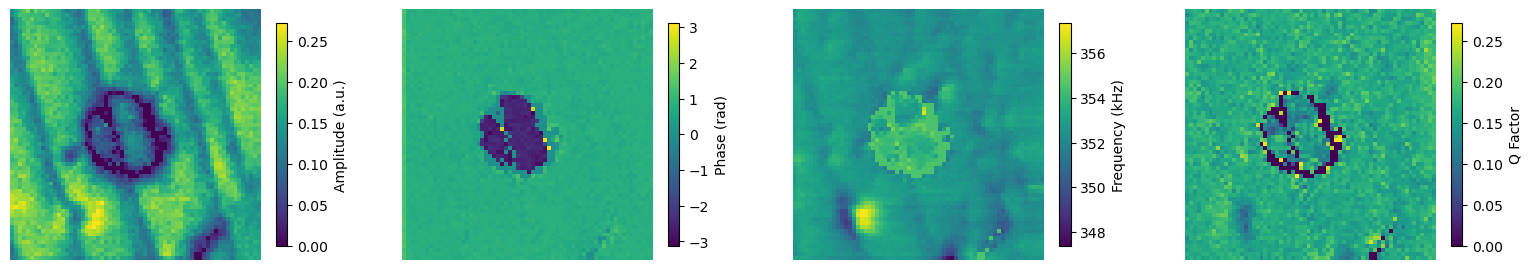

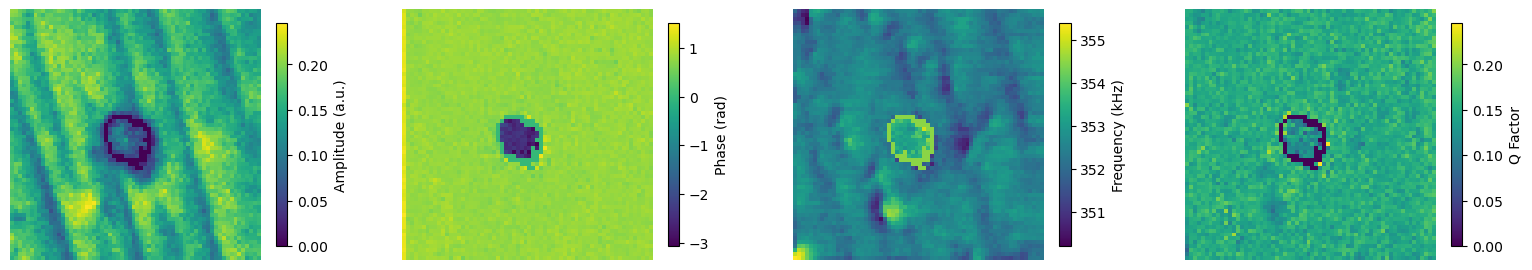

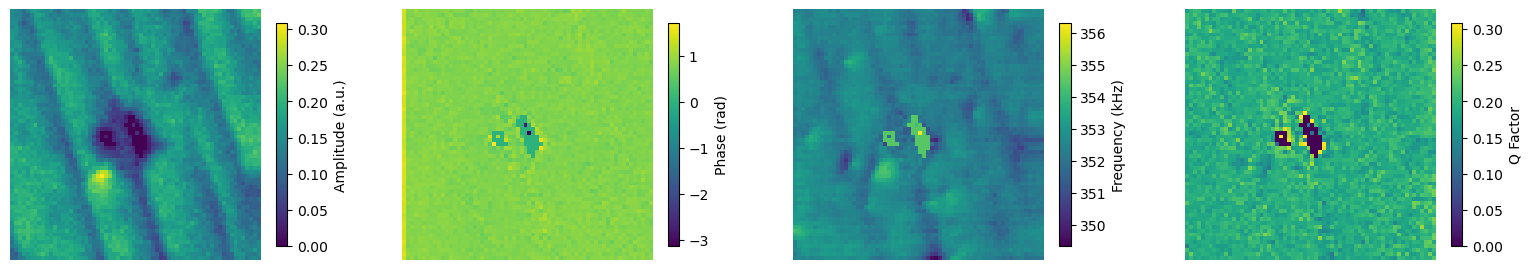

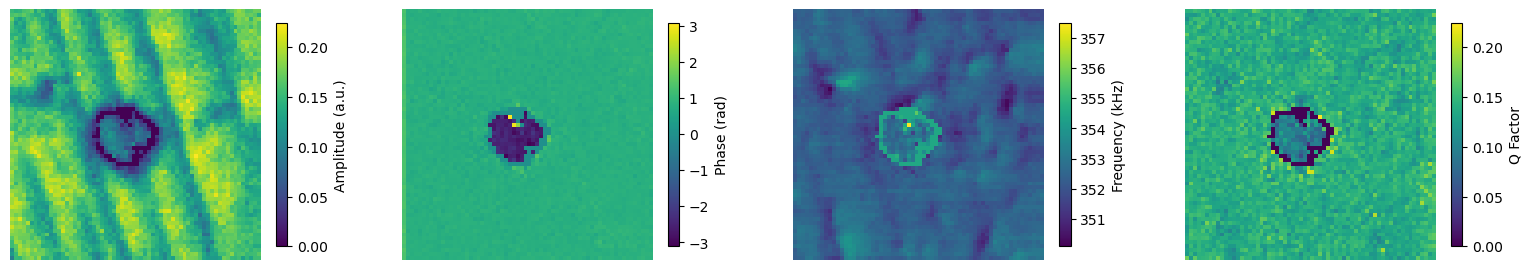

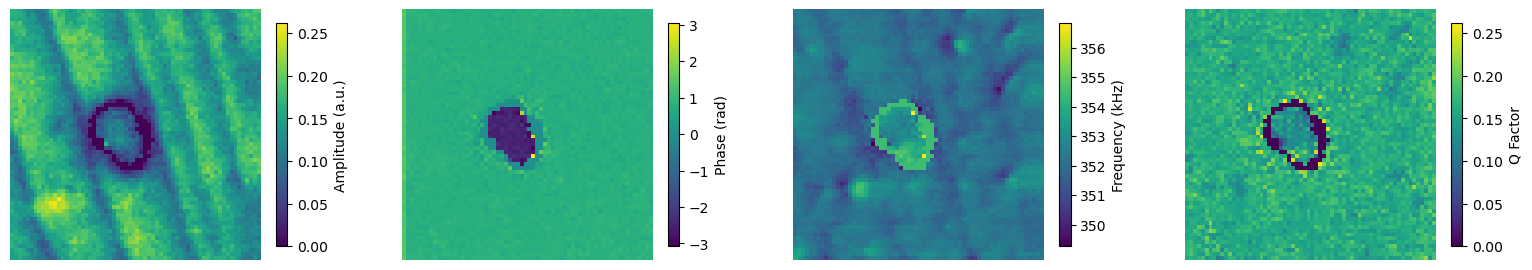

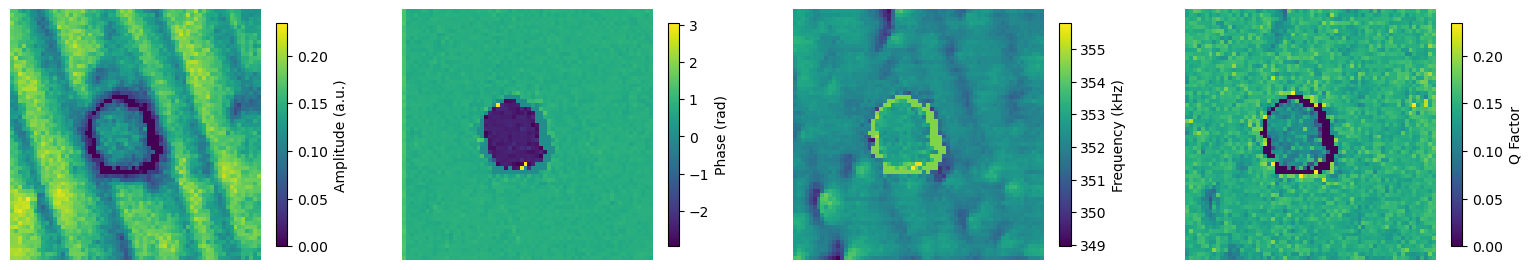

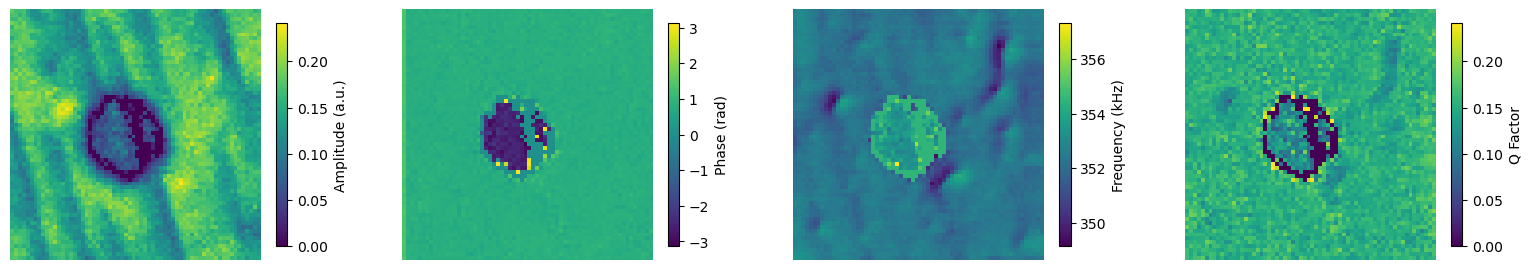

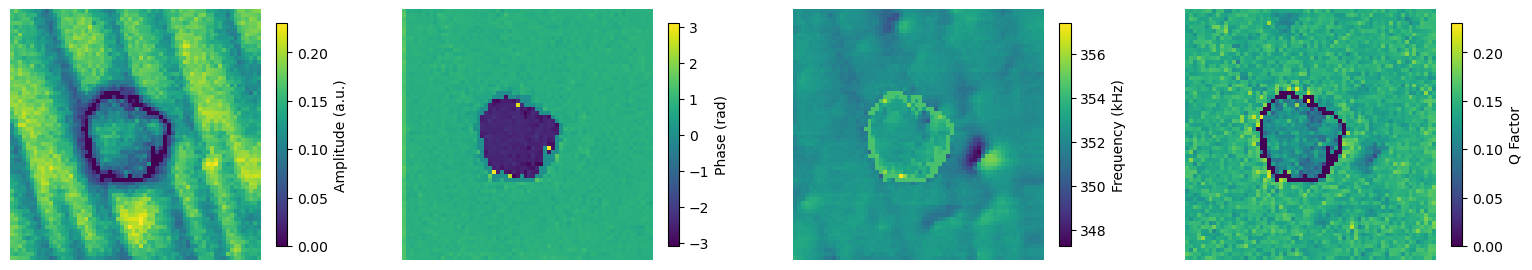

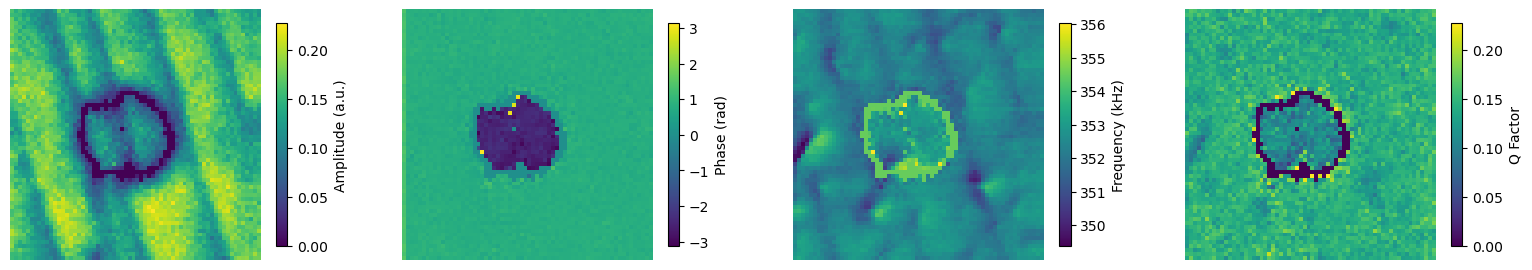

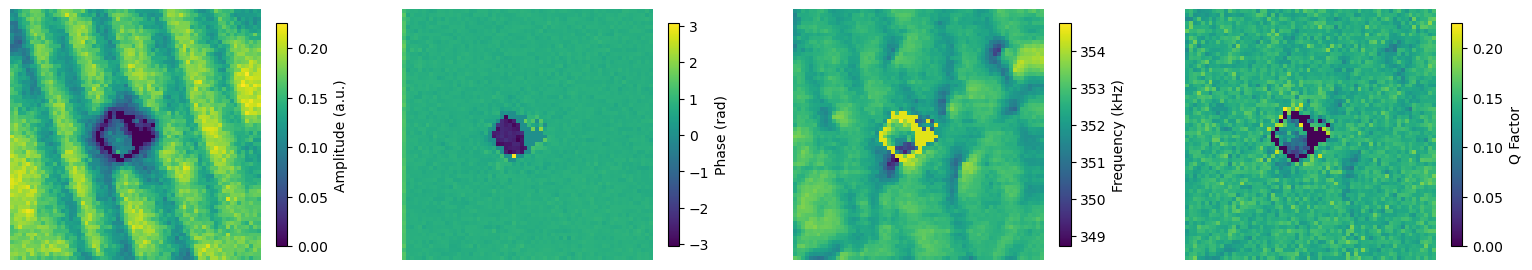

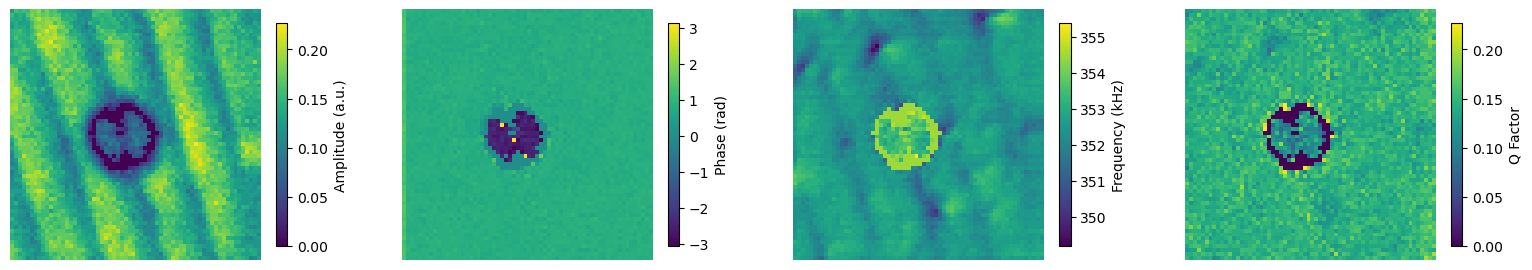

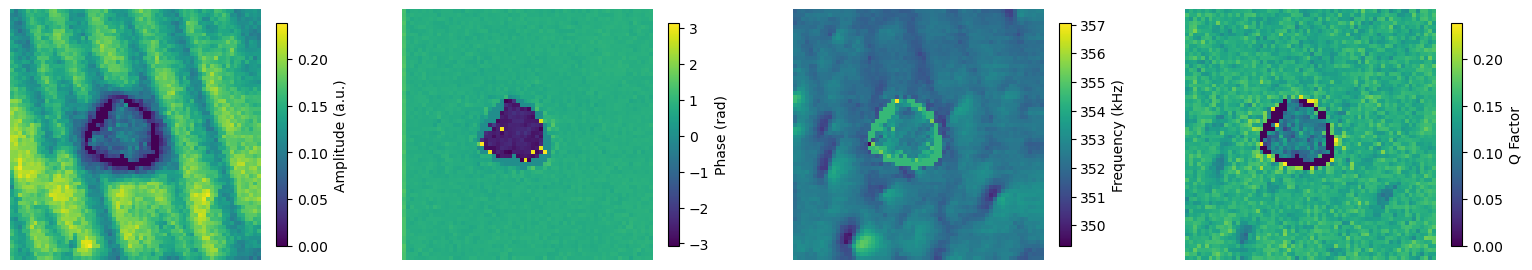

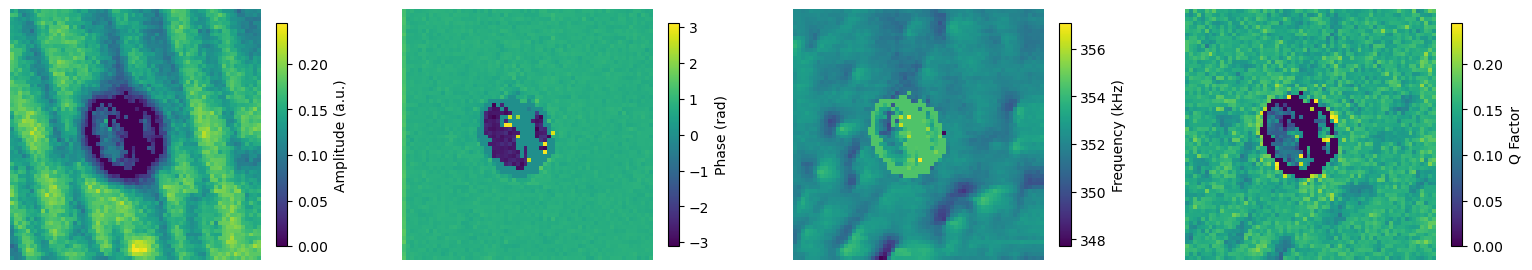

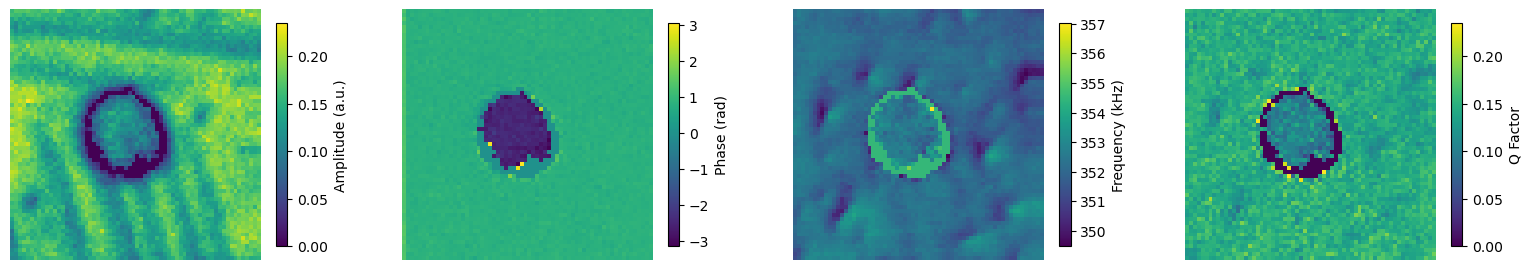

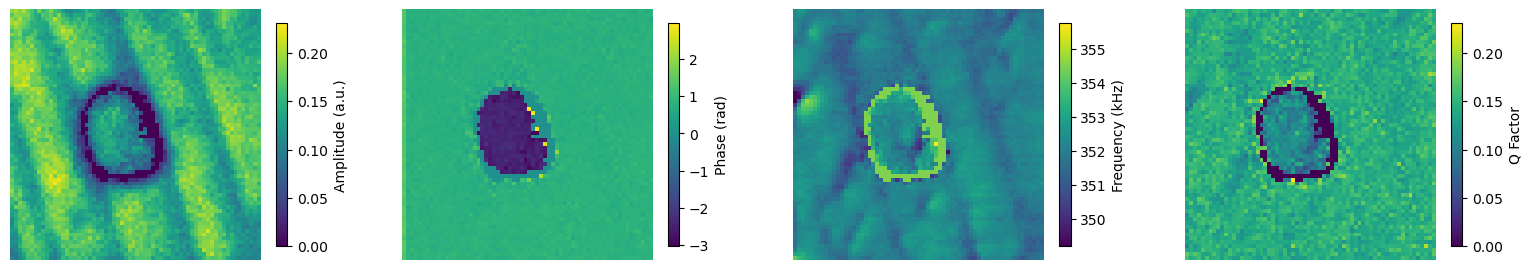

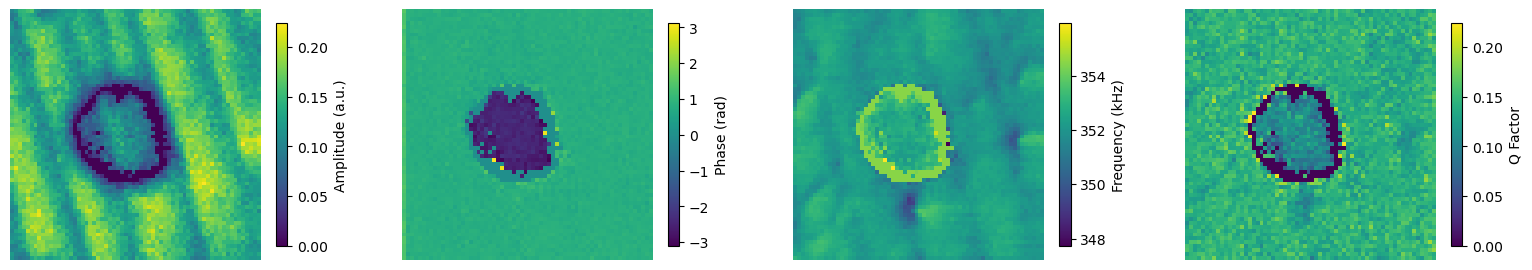

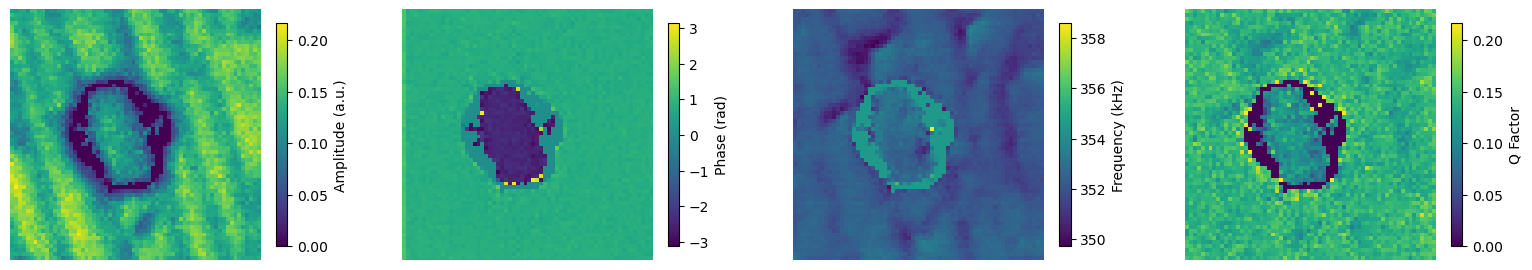

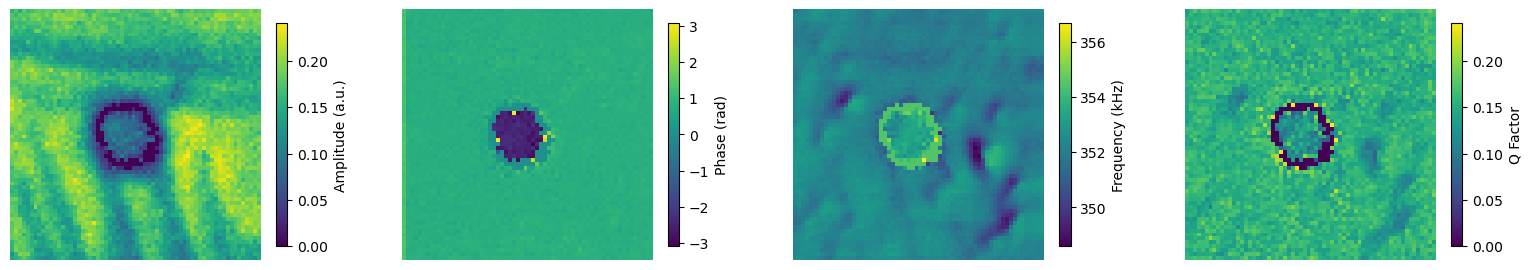

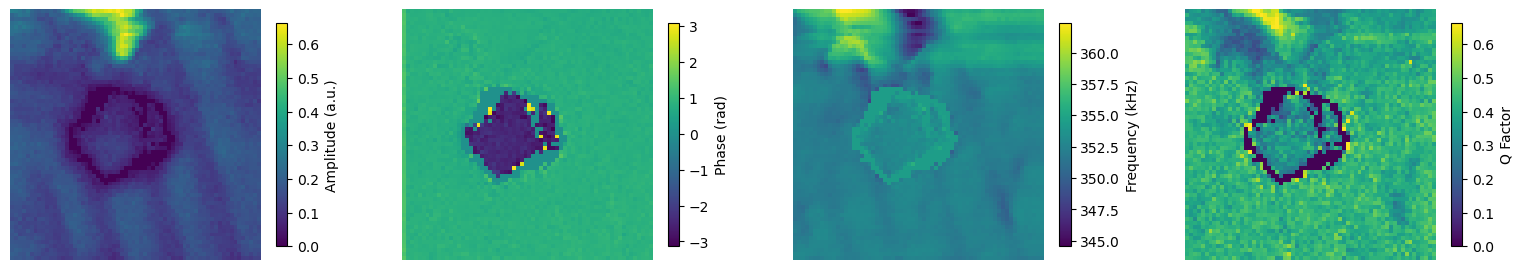

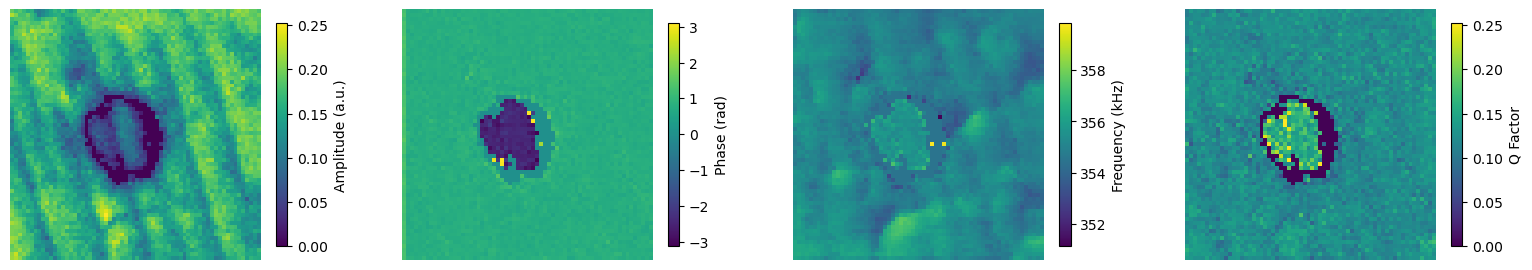

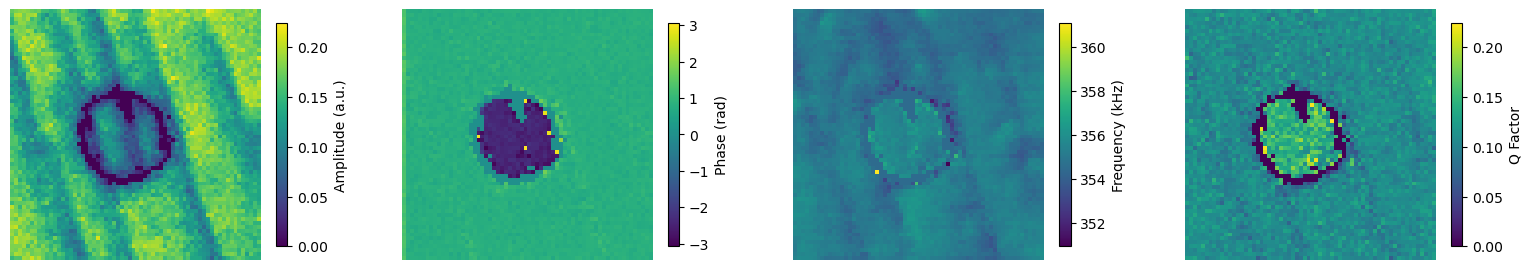

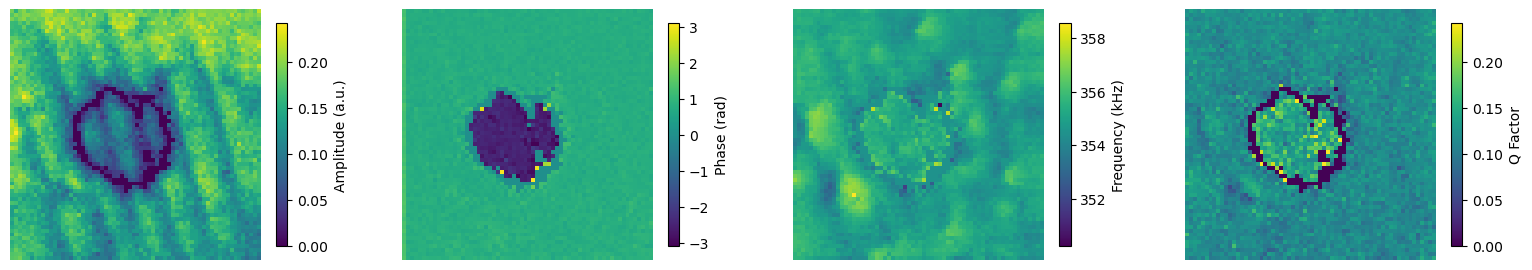

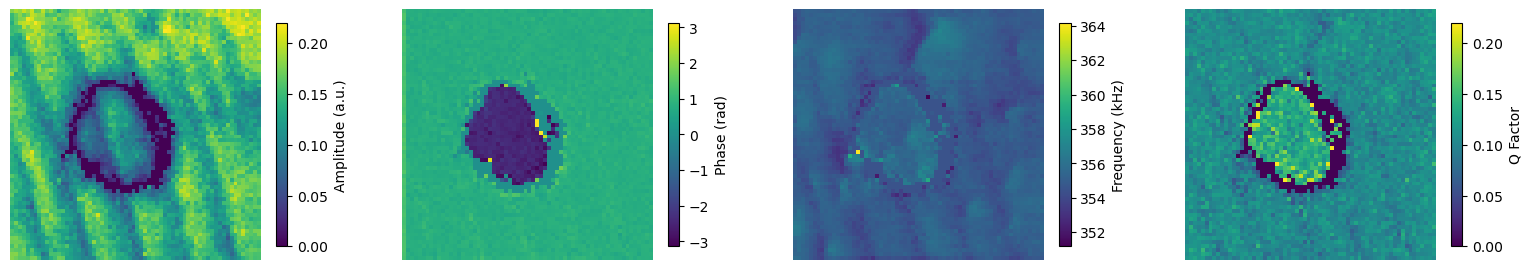

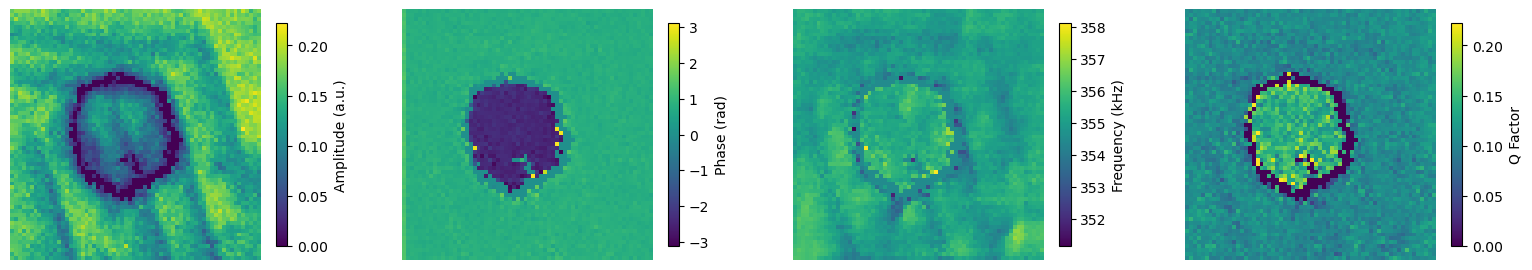

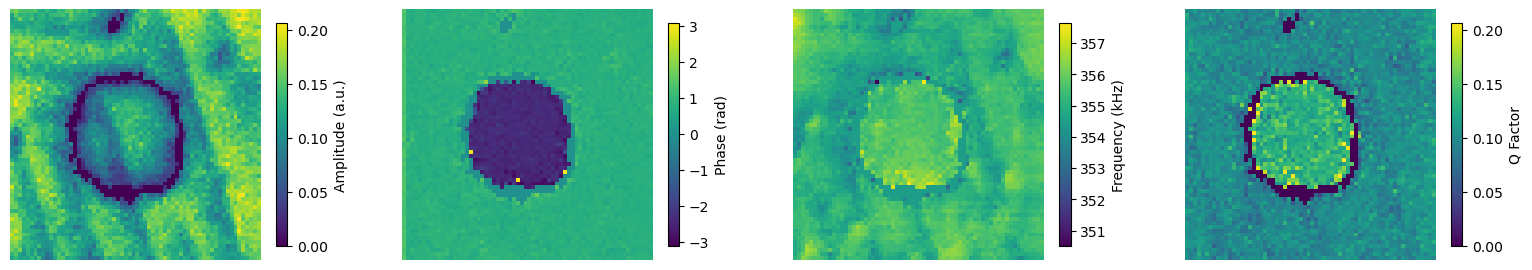

In [10]:
for i in range (count_imgs):

    fig, axs = plt.subplots(1, 4, figsize=(16, 4), dpi = 100)
    fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.99, wspace=0.25)
    cm = 'viridis'
    shrink = 0.6

    im0 = axs[0].imshow(amplitude[i, ]*1000, origin = "lower", interpolation='nearest', cmap=cm)
    fig.colorbar(im0, ax=axs[0], shrink = shrink, label = "Amplitude (a.u.)")
    axs[0].axis("off")

    im1 = axs[1].imshow(phase[i, ], origin = "lower", interpolation='nearest', cmap=cm)
    fig.colorbar(im1, ax=axs[1], shrink = shrink, label = "Phase (rad)")
    axs[1].axis("off")

    im2 = axs[2].imshow(frequency[i, ]/1000, origin = "lower", interpolation='nearest', cmap=cm)
    fig.colorbar(im2, ax=axs[2], shrink = shrink, label = "Frequency (kHz)")
    axs[2].axis("off")

    im3 = axs[3].imshow(qfactor[i, ], origin = "lower", vmin = 0, vmax = 250, interpolation='nearest', cmap=cm)
    fig.colorbar(im0, ax=axs[3], shrink = shrink, label = "Q Factor")
    axs[3].axis("off")
    
    plt.show()

Plot a specific channel together

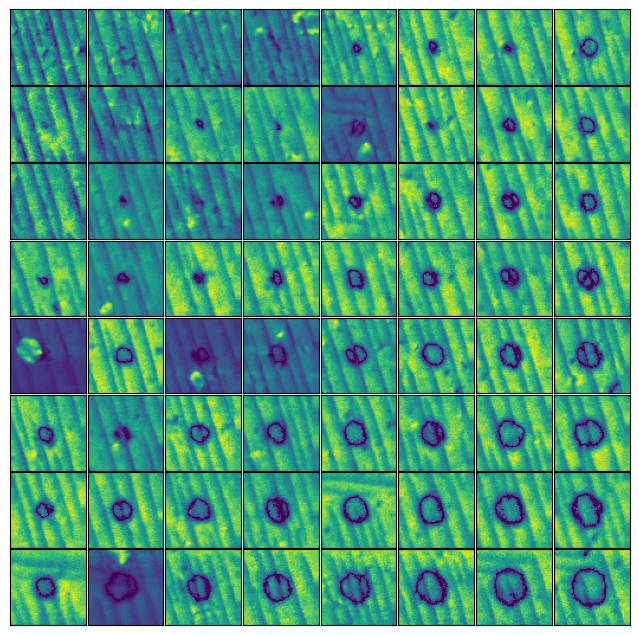

In [11]:
fig, axes = plt.subplots(num_y, num_x, figsize=(num_x, num_y),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.02, wspace=0.02))

for ax, i in zip(axes.flat, range(count_imgs)):
    ax.imshow(amplitude[i,], origin = "lower") # We are plotting amplitude now, you can change the channel to phase, frequency,etc